# Project FIFA MoneyBall

## 1 Import Libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math

import warnings
warnings.filterwarnings('ignore')

## 2 Import Data

In [110]:
data = pd.read_csv(r"Project_FIFA_MoneyBall/Data/fifa21_male2.csv")
data.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  ...  Standing Tackle  \
0       69        68          68        320          72  ... 

In [111]:
# set pandas option to be able to display all columns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## 3 Reviewing Data

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


## 3 Cleaning Data

In [113]:
# rename to lower case and replace space with underscore

data.columns = data.columns.str.lower()
data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [114]:
# rename category columns according to official FIFA website

data.rename(columns={'pac': 'pace', 'sho': 'shooting', 'pas': 'passing', 'def': 'defending', 'dri': 'dribbling', 'phy': 'physical'}, inplace=True)

In [115]:
# drop columns that cannot be used for analysis
# player_photo, club_logo, flag_photo are links
# there is only one gender so no added information
# loan_date_end are mainly null values or unstructured dates
# position because of several positions per row, we also have the column best position to use for position
# stats per position are dropped for now because I could not find a reason to keep them

data = data.drop(['player_photo', "club_logo", "flag_photo", "gender", "loan_date_end", "position"], axis=1)
data = data.drop(data.loc[:, "ls":"gk"].columns, axis = 1)

In [116]:
# id is unique, so I passed it as the index
data['id'].nunique()
data = data.set_index('id')

In [117]:
# clean up €,K,M formats from value, wage and release_clause column
# data was previously formatted as object, also some values were in M€, K€ and €
# now all columns are in € without characters

def clean_char(x):
    if (x.startswith('€') and x.endswith('K') and (x.find('.')>=0)):
        return x.replace("€","").replace("K","").replace(".","") + "00"      
    elif (x.startswith('€') and x.endswith('K')):
        return x.replace("€","").replace("K","") + "000" 
    if (x.startswith('€') and x.endswith('M') and (x.find('.')>=0)):
        return x.replace("€","").replace("M","").replace(".","") + "00000"      
    elif (x.startswith('€') and x.endswith('M')):
        return x.replace("€","").replace("M","") + "000000" 
    else:
        return x.replace("€","")

data['value'] = pd.to_numeric(data['value'].apply(clean_char))
data['wage'] = pd.to_numeric(data['wage'].apply(clean_char))
data['release_clause'] = pd.to_numeric(data['release_clause'].apply(clean_char))

In [118]:
# clean up K formats from hits column

data['hits'] = data['hits'].apply(lambda x: str(x).replace('.', ''))
data['hits'] = data['hits'].apply(lambda x: float(str(x).replace('K', '00')))

In [119]:
# add new calculated columns

data['value_per_pot'] = data.value / data.pot

### Deal with null values

In [120]:
# check for null values
# club 23
# joined 58
# volleys
# curve 58
# agility 58
# balance 58
# jumping 58
# interception 7
# positioning 7
# vision 58
# composure 423
# sliding tackle 58
# a/w 89
# d/w 89

#data.isna().sum()

In [121]:
# drop the ones with value, wage, release_clause zero and several attributes null
# all those players are either over 30 or have a low/mid ova (no hidden treasure)

data.dropna(subset = ["joined"], inplace=True)

In [122]:
# review pending null values
# club 18 - mix of good retired players and unknown players all with value and wage 0
# composure 365 - fill with ova ?
# a/w 31 - also composure NaN - replace with UNK - all with value and wage 0
# d/w 31 - also composure NaN - replace with UNK - all with value and wage 0

# team & contract = free means not currently with a club

#data[data["composure"].isna()==True]
#data[data['composure'].isna()==False]

In [123]:
# fill null and empty values with "UNK" (solves null values in clolumns club, a/w and d/w)
    
data["club"].fillna("UNK", inplace = True)
data["a/w"].fillna("UNK", inplace = True)
data["d/w"].fillna("UNK", inplace = True)

In [124]:
# fill composure null values with ova value

data["composure"].fillna(data["ova"], inplace = True)

In [125]:
# all null values have been removed
# data.isna().sum()

In [126]:
data.head()

name  age  ova nationality              club  bov   bp  pot  \
id                                                                       
2   G. Pasquale   33   69       Italy           Udinese   71  LWB   69   
16  Luis García   37   71       Spain         KAS Eupen   70   CM   71   
27      J. Cole   33   71     England     Coventry City   71  CAM   71   
41      Iniesta   36   81       Spain       Vissel Kobe   82  CAM   81   
61   D. Odonkor   27   66     Germany  Alemannia Aachen   66   RW   70   

                 team_&_contract height  weight   foot  growth        joined  \
id                                                                             
2            Udinese 2008 ~ 2016   6'0"  181lbs   Left       0   Jul 1, 2008   
16         KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right       0  Jul 19, 2014   
27     Coventry City 2016 ~ 2020   5'9"  161lbs  Right       0   Jan 7, 2016   
41       Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right       0  Jul 16, 2018   
61  Alemannia Aachen 2011 ~ 2012   5'8"  163lbs  Right       4   Jan 1, 2011   

      value   wage  release_clause     contract  attacking  crossing  \
id                                                                     
2    625000   7000               0  2008 ~ 2016        313        75   
16   600000   7000         1100000  2014 ~ 2019        337        68   
27  1100000  15000               0  2016 ~ 2020        337        80   
41  5500000  12000         7200000  2018 ~ 2021        367        75   
61   725000   5000               0  2011 ~ 2012        271        61   

    finishing  heading_accuracy  short_passing  volleys  skill  dribbling  \
id                                                                          
2          50                59             71     58.0    338         73   
16         64                61             76     68.0    369         69   
27         64                41             77     75.0    387         79   
41         69                54             90     79.0    408         85   
61         53                42             58     57.0    276         67   

    curve  fk_accuracy  long_passing  ball_control  movement  acceleration  \
id                                                                           
2    65.0           60            69            71       347            68   
16   79.0           79            71            71       305            56   
27   84.0           77            69            78       295            48   
41   80.0           70            83            90       346            61   
61   61.0           42            44            62       406            90   

    sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
id                                                                          
2             74     68.0         69     68.0    347          74     68.0   
16            50     62.0         65     72.0    324          75     54.0   
27            42     71.0         59     75.0    284          72     58.0   
41            56     79.0         75     75.0    297          67     40.0   
61            91     75.0         65     85.0    315          71     70.0   

    stamina  strength  long_shots  mentality  aggression  interceptions  \
id                                                                        
2        69        68          68        320          72           69.0   
16       64        60          71        362          71           71.0   
27       29        56          69        317          69           39.0   
41       58        62          70        370          58           70.0   
61       64        61          49        256          63           26.0   

    positioning  vision  penalties  composure  defending  marking  \
id                                                                  
2          63.0    66.0         50        NaN        208       70   
16         72.0    73.0         75       79.0        153       70 

In [127]:
# correcting values

# goalkeeper stats have been messed up from my understanding. 
# I individual attributes have been devided by the amount of attribute in the category goalkeeping

data["gk_diving"] = data["gk_diving"]*5
data["gk_handling"] = data["gk_handling"]*5
data["gk_kicking"] = data["gk_kicking"]*5
data["gk_positioning"] = data["gk_positioning"]*5
data["gk_reflexes"] = data["gk_reflexes"]*5
data["goalkeeping"] = data["goalkeeping"]/5
data["defending"] = data["defending"]/5

In [128]:
# create new dataframe with only summarized player attributes


In [129]:
#check numerical data
numerical = data._get_numeric_data()
numerical = numerical.drop(numerical.loc[:, "attacking":"sliding_tackle"].columns, axis = 1)
numerical = numerical.drop(numerical.loc[:, "gk_diving":"gk_reflexes"].columns, axis = 1)

numerical

age  ova  bov  pot  growth    value   wage  release_clause  \
id                                                                   
2        33   69   71   69       0   625000   7000               0   
16       37   71   70   71       0   600000   7000         1100000   
27       33   71   71   71       0  1100000  15000               0   
41       36   81   82   81       0  5500000  12000         7200000   
61       27   66   66   70       4   725000   5000               0   
...     ...  ...  ...  ...     ...      ...    ...             ...   
259088   22   64   66   69       5   550000   2000               0   
259090   18   56   58   66      10   130000   3000          273000   
259091   18   56   56   67      11   130000   2000          273000   
259101   20   62   62   73      11   475000   3000          784000   
259105   18   59   61   74      15   325000   2000          788000   

        goalkeeping  total_stats  base_stats  pace  shooting  passing  \
id                                                                      
2              11.2         1929         408    71        59       70   
16             11.2         1906         385    53        69       73   
27             10.2         1770         354    45        68       76   
41              9.0         2014         420    58        70       85   
61              9.2         1649         360    91        56       56   
...             ...          ...         ...   ...       ...      ...   
259088          7.8         1367         302    54        30       37   
259090         11.4         1529         319    62        46       57   
259091          8.0         1430         303    63        35       44   
259101         10.2         1579         335    71        34       58   
259105          9.6         1401         295    70        62       41   

        physical   hits  value_per_pot  
id                                      
2             69    4.0    9057.971014  
16            63    4.0    8450.704225  
27            52   11.0   15492.957746  
41            59  149.0   67901.234568  
61            63    7.0   10357.142857  
...          ...    ...            ...  
259088        69    5.0    7971.014493  
259090        55    5.0    1969.696970  
259091        55    3.0    1940.298507  
259101        54    5.0    6506.849315  
259105        49    4.0    4391.891892  

[17067 rows x 17 columns]

In [130]:
numerical.shape

(17067, 17)

In [131]:
# check categorial data
categoricals = data.select_dtypes('object').head()
categoricals

name nationality              club   bp  \
id                                                   
2   G. Pasquale       Italy           Udinese  LWB   
16  Luis García       Spain         KAS Eupen   CM   
27      J. Cole     England     Coventry City  CAM   
41      Iniesta       Spain       Vissel Kobe  CAM   
61   D. Odonkor     Germany  Alemannia Aachen   RW   

                 team_&_contract height  weight   foot        joined  \
id                                                                     
2            Udinese 2008 ~ 2016   6'0"  181lbs   Left   Jul 1, 2008   
16         KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right  Jul 19, 2014   
27     Coventry City 2016 ~ 2020   5'9"  161lbs  Right   Jan 7, 2016   
41       Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right  Jul 16, 2018   
61  Alemannia Aachen 2011 ~ 2012   5'8"  163lbs  Right   Jan 1, 2011   

       contract  w/f  sm     a/w     d/w   ir  
id                                             
2   2008 ~ 2016  3 ★  2★  Medium    High  2 ★  
16  2014 ~ 2019  4 ★  3★  Medium  Medium  1 ★  
27  2016 ~ 2020  4 ★  4★  Medium     Low  2 ★  
41  2018 ~ 2021  4 ★  4★    High  Medium  4 ★  
61  2011 ~ 2012  2 ★  3★  Medium  Medium  2 ★

In [132]:
numerical.describe().T

count          mean           std    min        25%  \
age             17067.0  2.525570e+01  4.930444e+00   16.0      21.00   
ova             17067.0  6.695248e+01  6.841916e+00   45.0      62.00   
bov             17067.0  6.788615e+01  6.615974e+00   44.0      64.00   
pot             17067.0  7.247278e+01  5.744063e+00   47.0      69.00   
growth          17067.0  5.520302e+00  5.790544e+00    0.0       0.00   
value           17067.0  2.576102e+06  5.379656e+06    0.0  375000.00   
wage            17067.0  1.056872e+04  2.117235e+04    0.0    1000.00   
release_clause  17067.0  4.589991e+06  1.035257e+07    0.0  519000.00   
goalkeeping     17067.0  1.551590e+01  1.623856e+01    1.0       9.60   
total_stats     17067.0  1.632202e+03  2.599752e+02  731.0    1493.00   
base_stats      17067.0  3.613121e+02  4.018789e+01  228.0     333.00   
pace            17067.0  6.808994e+01  1.115199e+01   25.0      62.00   
shooting        17067.0  5.494914e+01  1.386561e+01   16.0      46.00   
passing         17067.0  5.891522e+01  1.017666e+01   25.0      52.00   
physical        17067.0  6.490426e+01  9.652541e+00   27.0      59.00   
hits            17067.0  3.547571e+01  1.586687e+02    3.0       4.00   
value_per_pot   17067.0  3.268436e+04  6.252624e+04    0.0    5468.75   

                         50%           75%           max  
age             2.500000e+01  2.900000e+01  5.300000e+01  
ova             6.700000e+01  7.200000e+01  9.300000e+01  
bov             6.800000e+01  7.200000e+01  9.300000e+01  
pot             7.200000e+01  7.600000e+01  9.500000e+01  
growth          4.000000e+00  9.000000e+00  2.600000e+01  
value           8.000000e+05  2.400000e+06  1.055000e+08  
wage            3.000000e+03  1.100000e+04  5.600000e+05  
release_clause  1.300000e+06  3.900000e+06  2.031000e+08  
goalkeeping     1.060000e+01  1.180000e+01  8.800000e+01  
total_stats     1.660000e+03  1.812000e+03  2.316000e+03  
base_stats      3.620000e+02  3.890000e+02  4.980000e+02  
pace            6.900000e+01  7.500000e+01  9.600000e+01  
shooting        5.800000e+01  6.500000e+01  9.300000e+01  
passing         6.000000e+01  6.600000e+01  9.300000e+01  
physical        6.600000e+01  7.200000e+01  9.300000e+01  
hits            7.000000e+00  1.800000e+01  9.200000e+03  
value_per_pot   1.123188e+04  3.333333e+04  1.110526e+06

In [100]:
numerical_matrix = numerical.corr()
numerical_matrix

age       ova       bov       pot    growth     value  \
age             1.000000  0.515763  0.454790 -0.247624 -0.855045  0.098094   
ova             0.515763  1.000000  0.985899  0.588743 -0.597550  0.635948   
bov             0.454790  0.985899  1.000000  0.625206 -0.544719  0.645265   
pot            -0.247624  0.588743  0.625206  1.000000  0.296333  0.568711   
growth         -0.855045 -0.597550 -0.544719  0.296333  1.000000 -0.187270   
value           0.098094  0.635948  0.645265  0.568711 -0.187270  1.000000   
wage            0.203521  0.597044  0.596704  0.466782 -0.242412  0.822585   
release_clause  0.077277  0.601606  0.612548  0.554111 -0.161174  0.979283   
goalkeeping     0.125505  0.037591 -0.009594 -0.008279 -0.052628  0.002822   
total_stats     0.284522  0.611042  0.638884  0.331985 -0.392667  0.392699   
base_stats      0.413346  0.832130  0.829437  0.471744 -0.515260  0.529504   
pace           -0.178646  0.199626  0.211249  0.258643  0.020696  0.211229   
shooting        0.308738  0.486969  0.478301  0.242585 -0.334749  0.325354   
passing         0.395592  0.699633  0.690062  0.393776 -0.436048  0.446385   
physical        0.436035  0.542589  0.534777  0.157130 -0.485237  0.267631   
hits           -0.079351  0.241115  0.257169  0.350743  0.063035  0.402793   

                    wage  release_clause  goalkeeping  total_stats  \
age             0.203521        0.077277     0.125505     0.284522   
ova             0.597044        0.601606     0.037591     0.611042   
bov             0.596704        0.612548    -0.009594     0.638884   
pot             0.466782        0.554111    -0.008279     0.331985   
growth         -0.242412       -0.161174    -0.052628    -0.392667   
value           0.822585        0.979283     0.002822     0.392699   
wage            1.000000        0.798285    -0.011037     0.378891   
release_clause  0.798285        1.000000     0.004450     0.368082   
goalkeeping    -0.011037        0.004450     1.000000    -0.635506   
total_stats     0.378891        0.368082    -0.635506     1.000000   
base_stats      0.482171        0.499564     0.096723     0.681880   
pace            0.122872        0.200970    -0.002861     0.255149   
shooting        0.295737        0.302434     0.248559     0.324079   
passing         0.421424        0.419850     0.172097     0.557156   
physical        0.262080        0.251816     0.060888     0.299468   
hits            0.302034        0.410246    -0.031544     0.163207   

                base_stats      pace  shooting   passing  physical      hits  
age               0.413346 -0.178646  0.308738  0.395592  0.436035 -0.079351  
ova               0.832130  0.199626  0.486969  0.699633  0.542589  0.241115  
bov               0.829437  0.211249  0.478301  0.690062  0.534777  0.257169  
pot               0.471744  0.258643  0.242585  0.393776  0.157130  0.350743  
growth           -0.515260  0.020696 -0.334749 -0.436048 -0.485237  0.063035  
value             0.529504  0.211229  0.325354  0.446385  0.267631  0.402793  
wage              0.482171  0.122872  0.295737  0.421424  0.262080  0.302034  
release_clause    0.499564  0.200970  0.302434  0.419850  0.251816  0.410246  
goalkeeping       0.096723 -0.002861  0.248559  0.172097  0.060888 -0.031544  
total_stats       0.681880  0.255149  0.324079  0.557156  0.299468  0.163207  
base_stats        1.000000  0.435418  0.620738  0.851236  0.486231  0.201342  
pace              0.435418  1.000000  0.305168  0.247622 -0.128372  0.129779  
shooting          0.620738  0.305168  1.000000  0.659128  0.050565  0.123461  
passing           0.851236  0.247622  0.659128  1.000000  0.172126  0.163136  
physical          0.486231 -0.128372  0.050565  0.172126  1.000000  0.069964  
hits              0.201342  0.129779  0.123461  0.163136  0.069964  1.000000

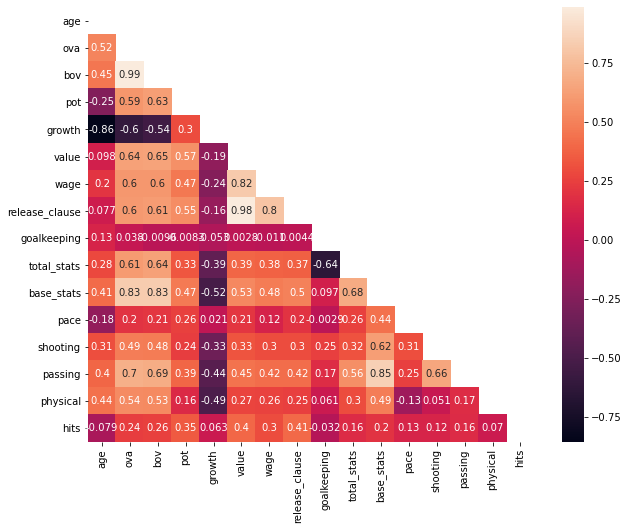

In [101]:
#create a heatmap for correlation of numerical data

mask = np.zeros_like(numerical_matrix)

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(numerical_matrix, mask=mask, annot=True)
plt.show()

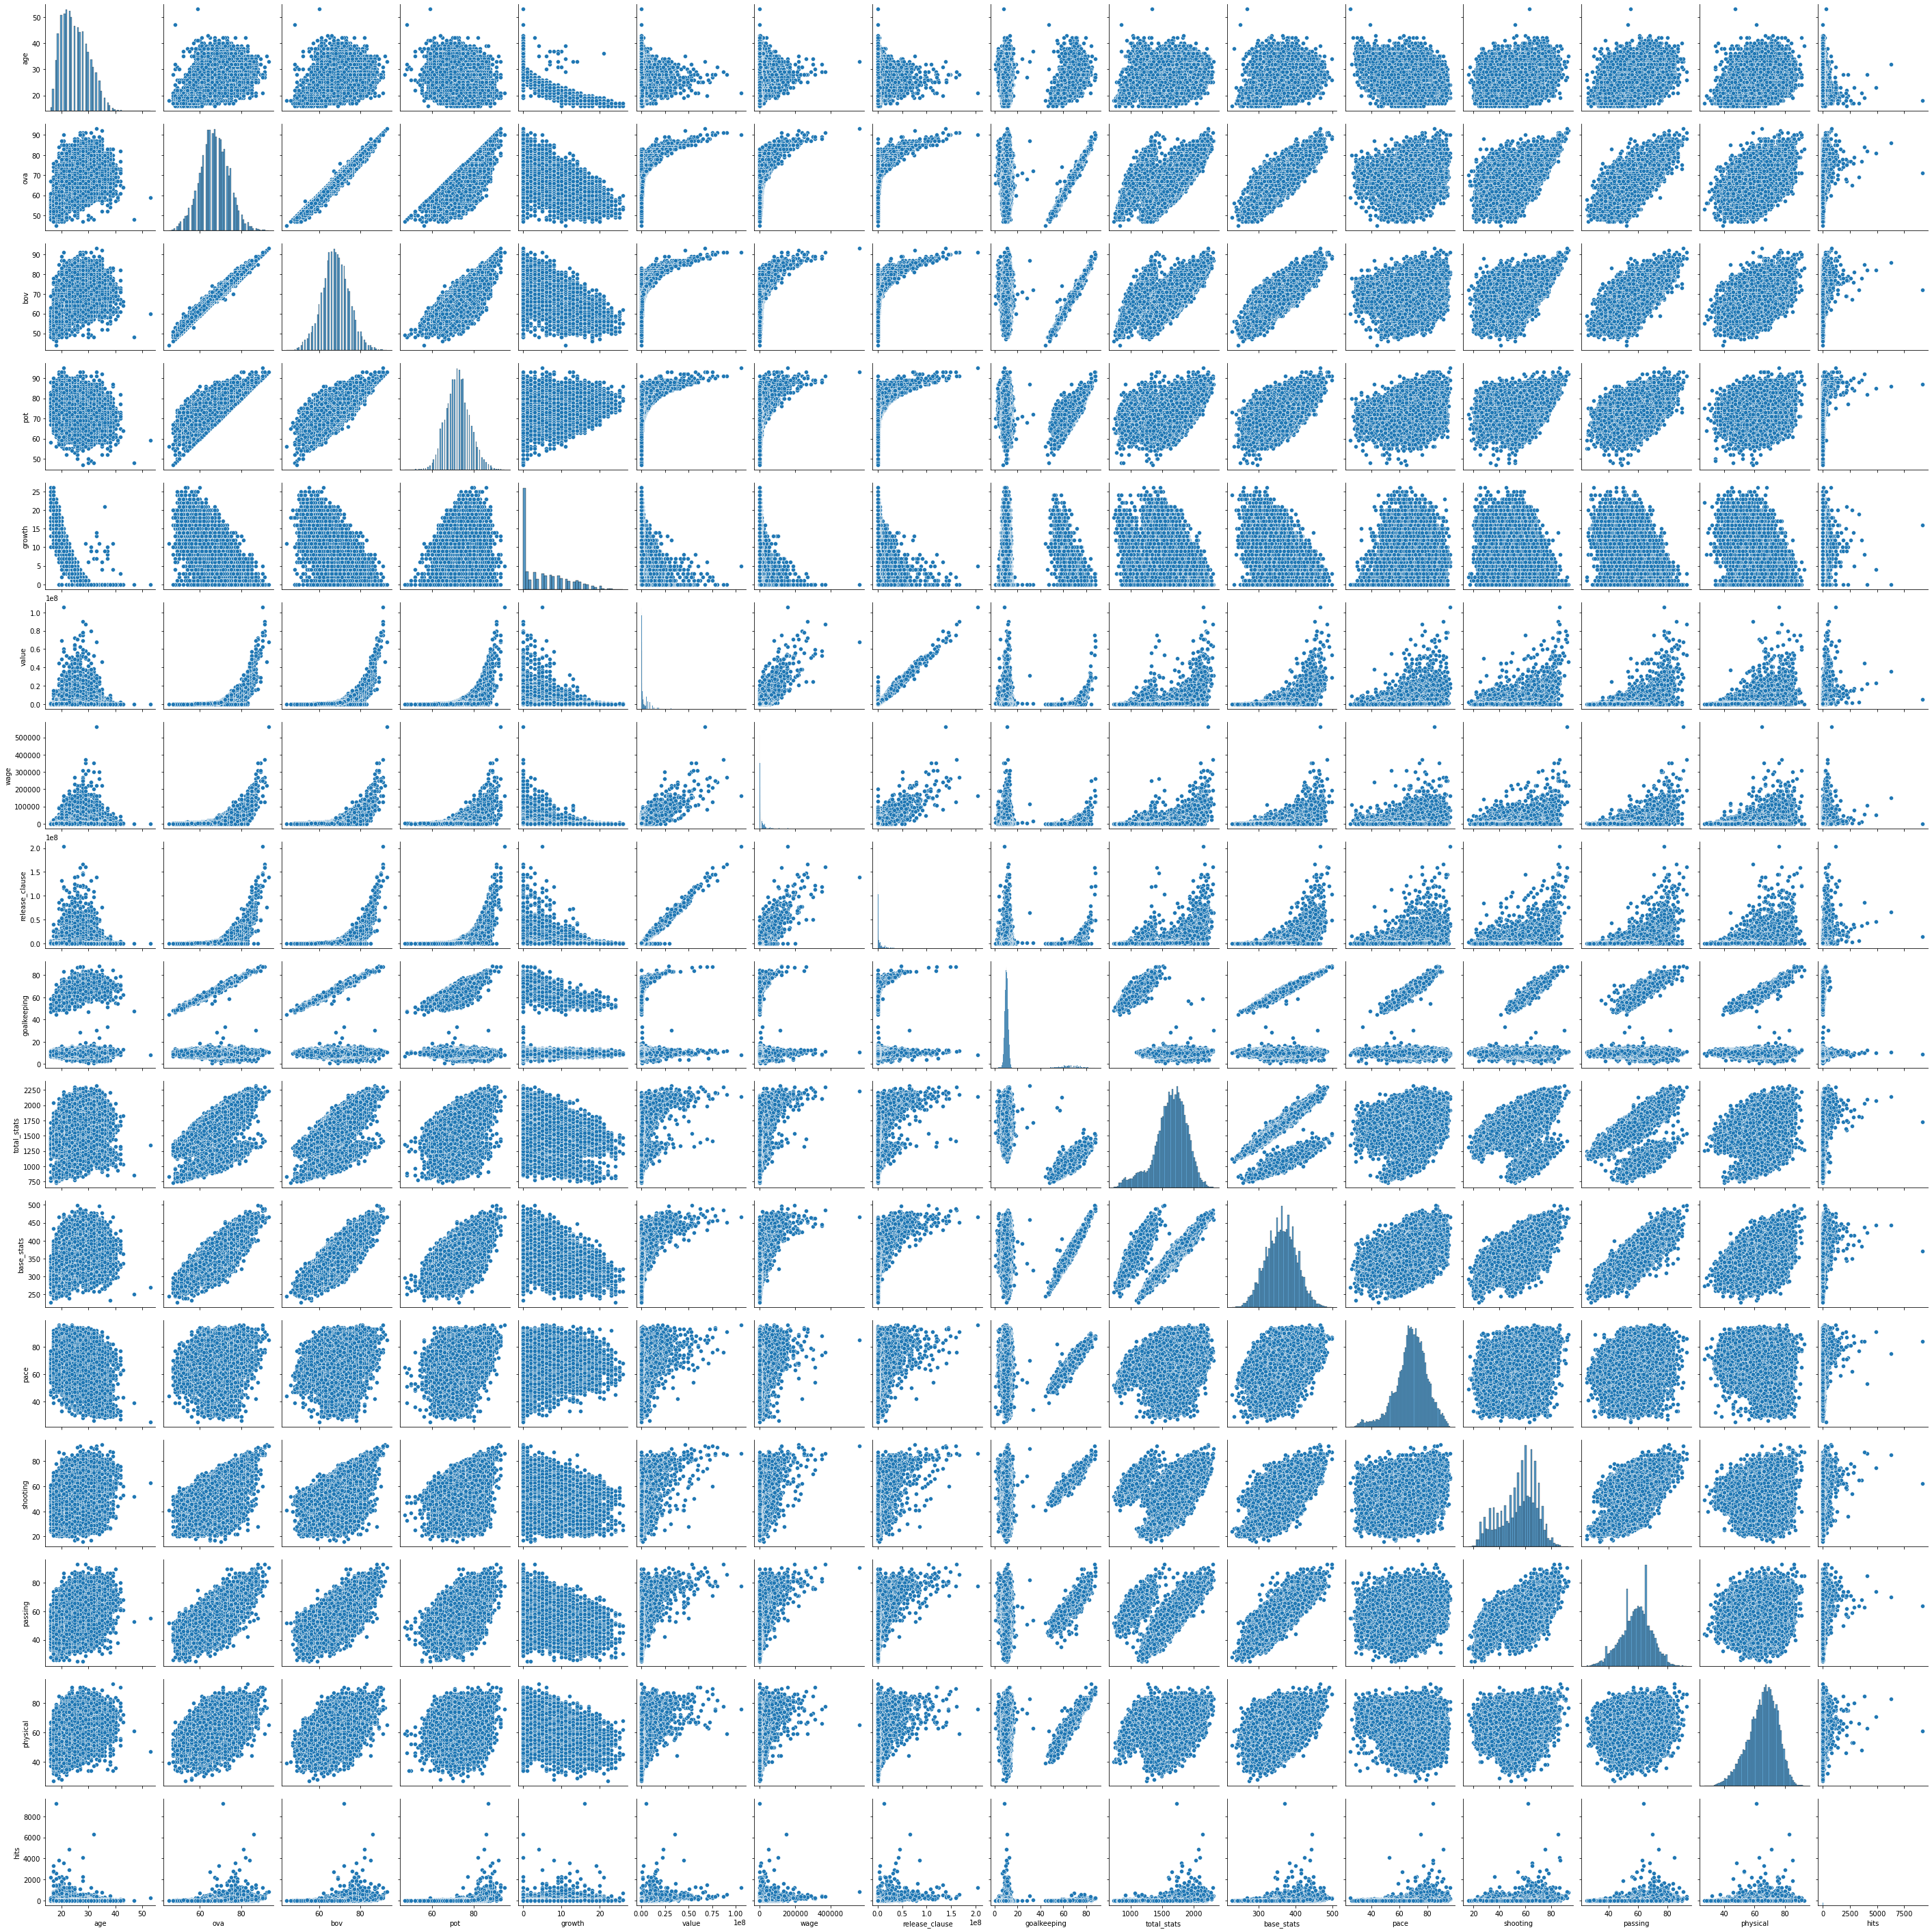

In [102]:
#check pairplot to understand the correlation pattern of all variables

sns.pairplot(numerical)

<AxesSubplot:xlabel='age', ylabel='value'>

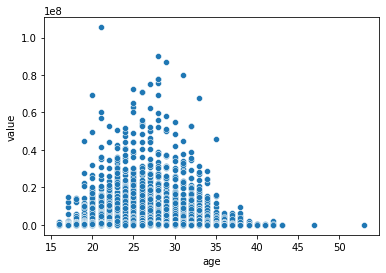

In [81]:
sns.scatterplot(data=data, x="age", y="value")

<AxesSubplot:xlabel='age', ylabel='value_per_pot'>

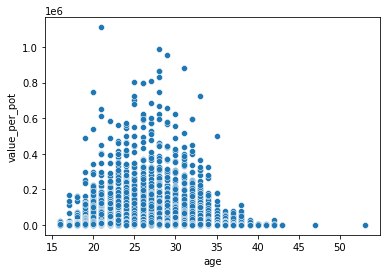

In [133]:
sns.scatterplot(data=data, x="age", y="value_per_pot")

In [135]:
# most common nationality

data.groupby("name")["value_per_pot"].min().sort_values(ascending=False).head(10)

name
K. Mbappé         1.110526e+06
Neymar Jr         9.890110e+05
K. De Bruyne      9.560440e+05
R. Lewandowski    8.791209e+05
S. Mané           8.666667e+05
M. Salah          8.666667e+05
V. van Dijk       8.296703e+05
J. Oblak          8.064516e+05
R. Sterling       8.055556e+05
P. Dybala         7.977528e+05
Name: value_per_pot, dtype: float64

In [152]:
data.groupby(['club', 'age']).size().sort_values(ascending=False).head(10)

club                 age
Uruguay              32     12
Charlton Athletic    20     10
RB Leipzig           18      9
OGC Nice             19      9
Bayern München II    19      9
PFC CSKA Moscow      22      9
Napoli               26      8
Fiorentina           22      8
SSV Jahn Regensburg  23      8
LOSC Lille           20      8
dtype: int64

In [149]:
# most expensive positions

data.groupby("club")["age"].mean().sort_values(ascending=True).head(10)

club
SC Beira Mar      17.000000
Halmstads BK      18.000000
Cesena            18.000000
Wexford Youths    18.000000
Bray Wanderers    18.333333
UCD AFC           18.500000
Dundee FC         19.000000
FC Barcelona B    19.000000
NAC Breda         19.250000
Silkeborg IF      19.500000
Name: age, dtype: float64

In [181]:
data.groupby('foot').nunique()

name  age  ova  nationality  club  bov  bp  pot  team_&_contract  \
foot                                                                       
Left    4127   28   45          133   795   44  15   42             3477   
Right  12311   30   47          162   886   48  15   47             8200   

       height  weight  growth  joined  value  wage  release_clause  contract  \
foot                                                                           
Left       19      48      25    1040    170   120             770       200   
Right      21      55      26    1774    208   140            1130       365   

       attacking  crossing  finishing  heading_accuracy  short_passing  \
foot                                                                     
Left         317        83         89                82             78   
Right        358        88         92                89             86   

       volleys  skill  dribbling  curve  fk_accuracy  long_passing  \
foot                                                                 
Left        85    349         89     85           86            78   
Right       87    386         90     90           88            83   

       ball_control  movement  acceleration  sprint_speed  agility  reactions  \
foot                                                                            
Left             87       281            78            80       73         58   
Right            89       325            86            85       81         69   

       balance  power  shot_power  jumping  stamina  strength  long_shots  \
foot                                                                        
Left        76    245          77       65       79        70          85   
Right       79    286          81       73       87        77          89   

       mentality  aggression  interceptions  positioning  vision  penalties  \
foot                                                                          
Left         294          81             83           88      80         82   
Right        350          88             89           94      84         87   

       composure  defending  marking  standing_tackle  sliding_tackle  \
foot                                                                    
Left          70        236       87               81              81   
Right         83        246       92               87              84   

       goalkeeping  gk_diving  gk_handling  gk_kicking  gk_positioning  \
foot                                                                     
Left           155         52           50          54              53   
Right          257         69           67          78              77   

       gk_reflexes  total_stats  base_stats  w/f  sm  a/w  d/w  ir  pace  \
foot                                                                       
Left            54          975         223    5   5    3    3   5    68   
Right           71         1367         243    5   5    3    3   5    72   

       shooting  passing  dribbling  defending  physical  hits  value_per_pot  
foot                                                                           
Left         71       62         64         75        58   299           1114  
Right        76       68         66         78        64   466           1625

## QUESTION 1 : does the foot (mathmatically) make a difference in certain player attributes?

In [202]:
# create foot_data dataframe to work with for this analysis
# add calculated columns to see the difference in number and %

foot_data = data.groupby('foot').mean().T

foot_data["abs_diff"] = round(abs(foot_data["Left"]) - abs(foot_data["Right"]),2)
foot_data["%_diff"] = abs(round(foot_data["abs_diff"] / abs(foot_data["Right"]) * 100, 2))
    
foot_data.T

age        ova        bov        pot    growth         value  \
foot                                                                           
Left      25.052531  67.149513  68.013549  72.666508  5.516995  2.694039e+06   
Right     25.322162  66.888025  67.844479  72.409409  5.521384  2.537520e+06   
abs_diff  -0.270000   0.260000   0.170000   0.260000 -0.000000  1.565186e+05   
%_diff     1.070000   0.390000   0.250000   0.360000  0.000000  6.170000e+00   

                  wage  release_clause   attacking   crossing  finishing  \
foot                                                                       
Left      10890.801046    4.817580e+06  268.711433  57.476587  48.573092   
Right     10463.359253    4.515538e+06  255.311353  49.682970  47.731182   
abs_diff    427.440000    3.020425e+05   13.400000   7.790000   0.840000   
%_diff        4.090000    6.690000e+00    5.250000  15.680000   1.760000   

          heading_accuracy  short_passing    volleys       skill  dribbling  \
foot                                                                          
Left             54.243166      62.467316  45.951272  283.732826  61.358688   
Right            53.349145      59.851633  44.696423  261.117963  56.682037   
abs_diff          0.890000       2.620000   1.250000   22.610000   4.680000   
%_diff            1.670000       4.380000   2.800000    8.660000   8.260000   

              curve  fk_accuracy  long_passing  ball_control   movement  \
foot                                                                      
Left      54.071785    48.407654     56.637509     63.257190  332.68386   
Right     48.103499    43.025194     53.545723     59.761509  319.97395   
abs_diff   5.970000     5.380000      3.090000      3.500000   12.71000   
%_diff    12.410000    12.500000      5.770000      5.860000    3.97000   

          acceleration  sprint_speed    agility  reactions    balance  \
foot                                                                    
Left         68.180889     68.012360  66.878298  62.776801  66.835512   
Right        64.544946     64.592068  63.857698  62.957154  64.022084   
abs_diff      3.640000      3.420000   3.020000  -0.180000   2.810000   
%_diff        5.640000      5.290000   4.730000   0.290000   4.390000   

               power  shot_power    jumping    stamina   strength  long_shots  \
foot                                                                            
Left      304.821726   59.901117  64.421203  65.218208  64.125981   51.155217   
Right     301.868118   59.637014  65.415241  62.680249  65.682970   48.452644   
abs_diff    2.950000    0.260000  -0.990000   2.540000  -1.560000    2.700000   
%_diff      0.980000    0.440000   1.510000   4.050000   2.380000    5.570000   

           mentality  aggression  interceptions  positioning     vision  \
foot                                                                      
Left      271.019967   58.299976      50.394343    54.728548  56.437366   
Right     259.024339   56.551244      45.924728    51.545801  55.118507   
abs_diff   12.000000    1.750000       4.470000     3.180000   1.320000   
%_diff      4.630000    3.090000       9.730000     6.170000   2.390000   

          penalties  composure  defending    marking  standing_tackle  \
foot                                                                    
Left      51.159734  60.632114  30.623485  50.718802        52.164725   
Right     49.884059  59.713990  27.574806  46.117418        47.009331   
abs_diff   1.280000   0.920000   3.050000   4.600000         5.160000   
%_diff     2.570000   1.540000  11.060000   9.970000        10.980000   

          sliding_tackle  goalkeeping  gk_diving  gk_handling  gk_kicking  \
foot                                                                        
Left           50.233896    12.711291  63.712860    63.785358   62.852389   
Right          44.747278    16.433390  82.743002    81.681182   81.120918   
abs_diff        5.490000    

In [205]:
# create column foot_2 to show which foot is the stronger one for this player attribute
# display the 10 values with the highest difference between both feet (all over 10%) 

conditions = [
    (foot_data["Left"] > foot_data["Right"]),
    (foot_data["Right"] > foot_data["Left"])
]

values = ["left", "right"]

foot_data["foot_2"] = np.select(conditions, values)

foot_data.sort_values(by='%_diff', ascending=False).head(10).T

gk_reflexes gk_diving gk_positioning goalkeeping gk_kicking  \
foot                                                                   
Left         64.0326   63.7129        63.3991     12.7113    62.8524   
Right        83.2943    82.743        81.9953     16.4334    81.1209   
abs_diff      -19.26    -19.03          -18.6       -3.72     -18.27   
%_diff         23.12        23          22.68       22.64      22.52   
foot_2         right     right          right       right      right   

         gk_handling     hits crossing fk_accuracy    curve  
foot                                                         
Left         63.7854  39.9308  57.4766     48.4077  54.0718  
Right        81.6812  34.0183   49.683     43.0252  48.1035  
abs_diff       -17.9     5.91     7.79        5.38     5.97  
%_diff         21.91    17.37    15.68        12.5    12.41  
foot_2         right     left     left        left     left

## QUESTION 2 : best 5 players per each 10 year age group

In [248]:
# create top_per_age dataframe to work with for this analysis
# add calculated columns to categorize players in age groups

age_data = data.copy()

conditions = [
    ((age_data["age"] >= 10) & (age_data["age"] < 20)),
    ((age_data["age"] >= 20) & (age_data["age"] < 30)),
    ((age_data["age"] >= 30) & (age_data["age"] < 40)),
    ((age_data["age"] >= 40) & (age_data["age"] < 50)),
    ((age_data["age"] >= 50) & (age_data["age"] < 60))
]

values = ["10-19", "20-29", "30-39", "40-49", "50-60"]

age_data["age_group"] = np.select(conditions, values)

age_data

name  age  ova         nationality              club  bov  \
id                                                                             
2           G. Pasquale   33   69               Italy           Udinese   71   
16          Luis García   37   71               Spain         KAS Eupen   70   
27              J. Cole   33   71             England     Coventry City   71   
41              Iniesta   36   81               Spain       Vissel Kobe   82   
61           D. Odonkor   27   66             Germany  Alemannia Aachen   66   
...                 ...  ...  ...                 ...               ...  ...   
259088       A. Medioub   22   64              France        CD Tondela   66   
259090       W. Rickard   18   56               Wales           Burnley   58   
259091       C. Barrett   18   56             England           Burnley   56   
259101   J. Gazibegović   20   62  Bosnia Herzegovina     SK Sturm Graz   62   
259105  Pablo Rodríguez   18   59               Spain             Lecce   61   

         bp  pot                  team_&_contract height  weight   foot  \
id                                                                        
2       LWB   69              Udinese 2008 ~ 2016   6'0"  181lbs   Left   
16       CM   71            KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right   
27      CAM   71        Coventry City 2016 ~ 2020   5'9"  161lbs  Right   
41      CAM   81          Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right   
61       RW   70     Alemannia Aachen 2011 ~ 2012   5'8"  163lbs  Right   
...     ...  ...                              ...    ...     ...    ...   
259088   CB   69  CD Tondela Jun 30, 2021 On Loan   6'6"  165lbs  Right   
259090  CAM   66              Burnley 2020 ~ 2021  5'10"  170lbs  Right   
259091   RB   67              Burnley 2020 ~ 2022   5'9"  154lbs  Right   
259101   RB   73        SK Sturm Graz 2020 ~ 2023   5'9"  148lbs  Right   
259105   ST   74                Lecce 2020 ~ 2024  5'10"  154lbs  Right   

        growth        joined    value   wage  release_clause  \
id                                                             
2            0   Jul 1, 2008   625000   7000               0   
16           0  Jul 19, 2014   600000   7000         1100000   
27           0   Jan 7, 2016  1100000  15000               0   
41           0  Jul 16, 2018  5500000  12000         7200000   
61           4   Jan 1, 2011   725000   5000               0   
...        ...           ...      ...    ...             ...   
259088       5  Sep 29, 2020   550000   2000               0   
259090      10  Aug 20, 2020   130000   3000          273000   
259091      11  Aug 20, 2020   130000   2000          273000   
259101      11  Sep 30, 2020   475000   3000          784000   
259105      15  Sep 30, 2020   325000   2000          788000   

                    contract  attacking  crossing  finishing  \
id                                                             
2                2008 ~ 2016        313        75         50   
16               2014 ~ 2019        337        68         64   
27               2016 ~ 2020        337        80         64   
41               2018 ~ 2021        367        75         69   
61               2011 ~ 2012        271        61         53   
...                      ...        ...       ...        ...   
259088  Jun 30, 2021 On Loan        197        35         23   
259090           2020 ~ 2021        248        50         43   
259091           2020 ~ 2022        218        55         34   
259101           2020 ~ 2023        223        62         26   
259105           2020 ~ 2024        254        32         64   

        heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
id                                                                          
2                     59             71     58.0    338         73   65.0   
16                    61             76     68.0    369         69   79.0   
27                    41    

In [268]:
# downsize dataframe for easier display options

#age_data = age_data[["age_group","age","name","ova","growth","pot"]]
age_data = age_data.groupby(["age_group"])
age_data

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [264]:
age_data_2= age_data.apply(lambda x: x.sort_values(by="ova", ascending=False))

In [265]:
age_data_2

age_group  age              name  ova  growth  pot
age_group id                                                       
10-19     239085     10-19   19        E. Haaland   84       8   92
          234396     10-19   19         A. Davies   81       8   89
          238794     10-19   19      Vinícius Jr.   80      13   93
          243812     10-19   19           Rodrygo   79      11   90
          246960     10-19   18      M. Ihattaren   77      11   88
...                    ...  ...               ...  ...     ...  ...
40-49     104900     40-49   41         M. Gurski   59       0   59
          2702       40-49   41        K. Ellison   58       0   58
          102881     40-49   40  K. Stamatopoulos   57       0   57
          53985      40-49   47          S. Royce   48       0   48
50-60     254704     50-60   53          K. Miura   59       0   59

[17067 rows x 6 columns]

In [267]:
age_data_3=age_data_2.reset_index(drop=True)
age_data_3.groupby('age_group').head(5)

age_group  age               name  ova  growth  pot
0         10-19   19         E. Haaland   84       8   92
1         10-19   19          A. Davies   81       8   89
2         10-19   19       Vinícius Jr.   80      13   93
3         10-19   19            Rodrygo   79      11   90
4         10-19   18       M. Ihattaren   77      11   88
2004      20-29   29       K. De Bruyne   91       0   91
2005      20-29   27           J. Oblak   91       2   93
2006      20-29   28          Neymar Jr   91       0   91
2007      20-29   28           M. Salah   90       0   90
2008      20-29   27            Alisson   90       1   91
13491     30-39   33           L. Messi   93       0   93
13492     30-39   35  Cristiano Ronaldo   92       0   92
13493     30-39   31     R. Lewandowski   91       0   91
13494     30-39   32          S. Agüero   89       0   89
13495     30-39   34           M. Neuer   89       0   89
17026     40-49   42          G. Buffon   82       0   82
17027     40-49   42             Hilton   77       0   77
17028     40-49   40       Rogério Ceni   75       0   75
17029     40-49   40            Valerón   74       0   74
17030     40-49   40         C. Pizarro   74       0   74
17066     50-60   53           K. Miura   59       0   59

<AxesSubplot:xlabel='goalkeeping', ylabel='count'>

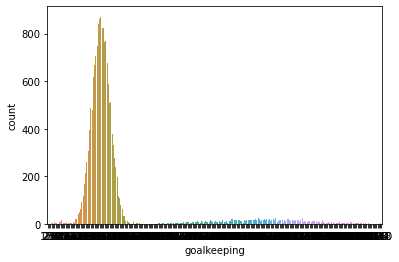

In [37]:
sns.countplot(data['goalkeeping'])

In [ ]:
plt.figure(figsize=(16,8))

sns.barplot(x="nationality", y="hits", data=data)
plt.show()

In [ ]:
sns.histplot(data=data, x="bp", hue="foot", multiple="hits", shrink=.8)